In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from sklearn.feature_selection import f_classif
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

Inspired and guided by the following notebook: [CFAS Ranking Neuropathology Features](https://github.com/mdrajab/CFAS-ranking-code/blob/main/python/2.%20CFAS%20Ranking%20Neuropathology%20Features.ipynb) by mdrajab, I have developed the code and analysis presented in this notebook.

## Reading in data

In [2]:
full_data = pd.read_excel("data/merged_data.xlsx")
full_data

,Donor ID,Age at Death Cat,Sex,Highest level of education,APOE4 Status,Cognitive Status,Brain pH,Fresh Brain Weight,Thal,Braak,...,GFAP area analyzed_Layer4,GFAP area analyzed_Layer5-6,ripa abeta40_Grey matter,ripa abeta42_Grey matter,ripa tTau_Grey matter,ripa pTau_Grey matter,guhcl abeta40_Grey matter,guhcl abeta42_Grey matter,guhcl tTau_Grey matter,guhcl pTau_Grey matter
0,H19.33.004,80-84,Female,Bachelors,N,No dementia,7.0,1035,Thal 0,Braak IV,...,5149101.50,24960854,0.019621,0.971579,1552.414737,1.901053,1.409474,9.487368,93.387368,1.493684
1,H20.33.001,80-84,Male,Bachelors,N,No dementia,6.8,1338,Thal 2,Braak IV,...,10035712.00,39595568,0.215789,2.744211,756.090526,2.737895,1.015616,7.822105,76.413684,1.580000
2,H20.33.002,90+,Female,High School,N,No dementia,7.3,1078,Thal 0,Braak IV,...,7088817.00,24013120,0.000598,0.147158,313.525263,2.615789,0.100708,0.610526,31.521053,1.068421
3,H20.33.004,85-89,Male,Trade School/ Tech School,Y,Dementia,6.7,1261,Thal 5,Braak V,...,9473856.00,14944554,60.766316,80.266316,318.528421,7.412632,91.172000,226.900000,44.423158,2.397895
4,H20.33.005,90+,Female,High School,N,No dementia,6.8,1003,Thal 3,Braak IV,...,4675924.00,24942594,5.136842,16.156842,107.348421,1.327368,28.778000,121.266000,10.516842,0.545263
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,H21.33.043,90+,Female,Bachelors,N,Dementia,6.6,1082,Thal 4,Braak II,...,9706169.00,38430856,1.593684,29.892632,611.000000,4.404211,3.465263,114.392632,48.078947,2.775789
79,H21.33.044,85-89,Female,Trade School/ Tech School,N,Dementia,6.6,1168,Thal 3,Braak VI,...,9958693.00,41765288,7.130526,33.637895,417.894737,3.662105,10.273684,111.835790,59.477895,1.818947
80,H21.33.045,90+,Female,High School,Y,Dementia,7.2,925,Thal 4,Braak VI,...,8399442.00,36778840,21.423158,53.878947,147.565263,11.489474,46.231579,954.656984,14.405263,1.678947
81,H21.33.046,90+,Male,Professional,N,Dementia,6.4,1159,Thal 4,Braak V,...,3684067.25,16472456,2.421053,19.195789,1124.777383,3.129474,26.908000,1694.563486,262.382105,1.815789


In [3]:
full_data.describe()

,Brain pH,Fresh Brain Weight,Total Microinfarcts (not observed grossly),Total microinfarcts in screening sections,Fresh Brain Weight Numeric,ABeta40 pg/ug (RIPA),ABeta42 pg/ug (RIPA),tTAU pg/ug (RIPA),pTAU pg/ug (RIPA),ABeta40 pg/ug (GuHCl),...,GFAP area analyzed_Layer4,GFAP area analyzed_Layer5-6,ripa abeta40_Grey matter,ripa abeta42_Grey matter,ripa tTau_Grey matter,ripa pTau_Grey matter,guhcl abeta40_Grey matter,guhcl abeta42_Grey matter,guhcl tTau_Grey matter,guhcl pTau_Grey matter
count,83.000000,83.000000,83.000000,83.00000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,...,8.300000e+01,8.300000e+01,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000
mean,6.680723,1156.662651,1.469880,1.00000,1156.662651,30.831579,66.810029,502.780112,4.209106,64.046636,...,7.532434e+06,3.291579e+07,30.831579,85.486574,502.780112,4.209106,64.046636,532.500613,62.464857,1.953101
std,0.404082,118.255849,2.799553,2.01821,118.255849,112.389729,161.477269,785.666814,2.604144,247.110876,...,3.734012e+06,1.510168e+07,112.389729,230.691477,785.666814,2.604144,247.110876,672.557561,46.362236,0.744150
min,4.500000,908.000000,0.000000,0.00000,908.000000,0.000130,0.019621,21.718947,1.280000,0.000805,...,1.708726e+06,1.169982e+07,0.000130,0.019621,21.718947,1.280000,0.000805,0.073579,0.009000,0.302105
25%,6.400000,1057.000000,0.000000,0.00000,1057.000000,0.394663,6.666316,198.871579,2.662632,1.548805,...,4.963906e+06,2.204580e+07,0.394663,6.666316,198.871579,2.662632,1.548805,13.494737,28.320000,1.533684
50%,6.700000,1162.000000,0.000000,0.00000,1162.000000,2.671579,29.892632,318.528421,3.398947,10.273684,...,6.689850e+06,3.185892e+07,2.671579,29.955789,318.528421,3.398947,10.273684,201.988000,56.110526,1.935789
75%,6.800000,1252.000000,1.500000,1.00000,1252.000000,19.602789,72.382632,563.714737,5.161579,41.996316,...,9.912589e+06,3.999113e+07,19.602789,75.283158,563.714737,5.161579,41.996316,935.147791,81.892632,2.401579
max,7.600000,1397.000000,15.000000,10.00000,1397.000000,981.444000,1412.566961,7005.543158,15.917895,2179.336000,...,2.210156e+07,1.002938e+08,981.444000,1569.147242,7005.543158,15.917895,2179.336000,2517.699435,262.382105,3.671579


In [4]:
full_data_mod = full_data.copy()

## Encoding categorical variables

Age

In [5]:
ordinal_labels = ['65-74', '75-79', '80-84', '85-89', '90+']
ordinal_mapping = {label: i for i, label in enumerate(ordinal_labels)}
full_data_mod['Age at Death Cat'] = full_data_mod['Age at Death Cat'].map(ordinal_mapping)

Education

In [6]:
ordinal_labels = ['High School', 'Trade School/ Tech School', 'Bachelors', 'Professional', 'Graduate (PhD/Masters)']
ordinal_mapping = {label: i for i, label in enumerate(ordinal_labels)}
full_data_mod['Highest level of education'] = full_data_mod['Highest level of education'].map(ordinal_mapping)

Thal

In [7]:
ordinal_labels = ['Thal 0', 'Thal 1', 'Thal 2', 'Thal 3', 'Thal 4', 'Thal 5']
ordinal_mapping = {label: i for i, label in enumerate(ordinal_labels)}
full_data_mod['Thal'] = full_data_mod['Thal'].map(ordinal_mapping)

Braak

In [8]:
ordinal_labels = ['Braak 0', 'Braak II', 'Braak III', 'Braak IV', 'Braak V', 'Braak VI']
ordinal_mapping = {label: i for i, label in enumerate(ordinal_labels)}
full_data_mod['Braak'] = full_data_mod['Braak'].map(ordinal_mapping)

CERAD score

In [9]:
ordinal_labels = ['Absent', 'Sparse', 'Moderate', 'Frequent']
ordinal_mapping = {label: i for i, label in enumerate(ordinal_labels)}
full_data_mod['CERAD score'] = full_data_mod['CERAD score'].map(ordinal_mapping)

Overal CAA score

In [10]:
ordinal_labels = ['Not identified', 'Mild', 'Moderate', 'Severe']
ordinal_mapping = {label: i for i, label in enumerate(ordinal_labels)}
full_data_mod['Overall CAA Score'] = full_data_mod['Overall CAA Score'].map(ordinal_mapping)

Arteriolosclerosis

In [11]:
ordinal_labels = ['Mild', 'Moderate', 'Severe']
ordinal_mapping = {label: i for i, label in enumerate(ordinal_labels)}
full_data_mod['Arteriolosclerosis'] = full_data_mod['Arteriolosclerosis'].map(ordinal_mapping)

Sex

In [12]:
nominal_labels = ['Male', 'Female']
nominal_mapping = {label: i for i, label in enumerate(nominal_labels)}
full_data_mod['Sex'] = full_data_mod['Sex'].map(nominal_mapping)

APOE4 Status

In [13]:
nominal_labels = ['N', 'Y']
nominal_mapping = {label: i for i, label in enumerate(nominal_labels)}
full_data_mod['APOE4 Status'] = full_data_mod['APOE4 Status'].map(nominal_mapping)

Cognitive Status

In [14]:
nominal_labels = ['No dementia', 'Dementia']
nominal_mapping = {label: i for i, label in enumerate(nominal_labels)}
full_data_mod['Cognitive Status'] = full_data_mod['Cognitive Status'].map(nominal_mapping)

LATE

In [15]:
ordinal_labels = ['Not Identified', 'Unclassifiable', 'LATE Stage 1', 'LATE Stage 2', 'LATE Stage 3']
ordinal_mapping = {label: i for i, label in enumerate(ordinal_labels)}
full_data_mod['LATE'] = full_data_mod['LATE'].map(ordinal_mapping)

Highest Lewy Body Disease

In [16]:
nominal_labels = ['Not Identified (olfactory bulb not assessed)', 'Not Identified (olfactory bulb assessed)', 'Neocortical (Diffuse)', 'Limbic (Transitional)', 'Amygdala-predominant', 'Olfactory bulb only', 'Brainstem-predominant']
nominal_mapping = {label: i for i, label in enumerate(nominal_labels)}
full_data_mod['Highest Lewy Body Disease'] = full_data_mod['Highest Lewy Body Disease'].map(nominal_mapping)

Overall AD neuropathological Change

In [17]:
ordinal_labels = ['Not AD', 'Low', 'Intermediate', 'High']
ordinal_mapping = {label: i for i, label in enumerate(ordinal_labels)}
full_data_mod['Overall AD neuropathological Change'] = full_data_mod['Overall AD neuropathological Change'].map(ordinal_mapping)

## Filtering quantitative neuropathology data

In [18]:
quant_neuropath= pd.read_excel("data/quant_neuropath.xlsx")

full_data_mod = full_data_mod.drop(columns=quant_neuropath.columns)
grey_matter_cols = quant_neuropath.columns[quant_neuropath.columns.str.endswith("_Grey matter")]

full_data_mod = pd.concat([full_data_mod, quant_neuropath[grey_matter_cols]], axis=1)
full_data_mod

,Age at Death Cat,Sex,Highest level of education,APOE4 Status,Cognitive Status,Brain pH,Fresh Brain Weight,Thal,Braak,CERAD score,...,average GFAP positive branch length_Grey matter,GFAP area analyzed_Grey matter,ripa abeta40_Grey matter,ripa abeta42_Grey matter,ripa tTau_Grey matter,ripa pTau_Grey matter,guhcl abeta40_Grey matter,guhcl abeta42_Grey matter,guhcl tTau_Grey matter,guhcl pTau_Grey matter
0,2,1,2,0,0,7.0,1035,0,3,0,...,767.700509,9.967436e+07,981.444000,142.778000,1122.432229,5.415789,2179.336000,1737.483712,27.065263,2.638947
1,2,0,2,0,0,6.8,1338,2,3,1,...,629.862908,8.633284e+07,0.007088,0.245263,7005.543158,5.630526,0.203116,0.311579,109.728421,1.957895
2,4,1,0,0,0,7.3,1078,0,3,0,...,273.062600,9.194560e+07,21.423158,53.878947,147.565263,11.489474,46.231579,954.656984,14.405263,1.678947
3,3,0,1,1,1,6.7,1261,5,4,3,...,300.042261,3.783612e+07,25.295789,69.988421,283.436842,15.917895,46.929474,1103.876312,17.046316,2.871579
4,4,1,0,0,0,6.8,1003,3,3,2,...,494.873814,6.864813e+07,0.526168,16.137895,258.624211,3.398947,1.675758,97.642105,83.395789,1.680000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,4,1,2,0,1,6.6,1082,4,1,1,...,284.373901,5.206576e+07,1.450526,76.226316,704.801053,4.146316,2.818947,182.274737,74.063158,2.188421
79,3,1,1,0,1,6.6,1168,3,5,3,...,877.006041,9.661378e+07,5.010526,88.169474,740.583158,3.327368,6.568421,340.077895,110.118947,1.825263
80,4,1,0,1,1,7.2,925,4,5,3,...,561.233845,1.214442e+08,0.065192,0.490526,894.136842,3.850526,0.071711,0.898947,141.738947,2.167368
81,4,0,3,0,1,6.4,1159,4,4,2,...,1154.268425,8.217667e+07,20.538947,47.932632,531.651579,2.507368,51.310526,330.860000,129.435789,1.876842


## Setting up X (features) and y (target). 

In [20]:
X = full_data.drop(['Overall AD neuropathological Change', 'Donor ID', 'Atherosclerosis'], axis=1)
y = full_data['Overall AD neuropathological Change'] 

X_mod = full_data_mod.drop(['Overall AD neuropathological Change', 'Atherosclerosis'], axis=1) 
y_mod = full_data_mod['Overall AD neuropathological Change'] 

## Chi-squared test

In [23]:
donor_features = ['Age at Death Cat', 'Sex', 'Highest level of education', 'APOE4 Status', 'Cognitive Status', 'Thal', 'Braak', 'CERAD score', 'Overall CAA Score', 'Highest Lewy Body Disease', 'Arteriolosclerosis', 'LATE']
categorical_features = X[donor_features]
significant_donor_features = []

for feature in donor_features:
    contingency_table = pd.crosstab(X_mod[feature], y_mod)
    _, p_value, _, _ = chi2_contingency(contingency_table)
    if p_value < 0.05:  
        significant_donor_features.append(feature)

X_selected_donor_chi = X[significant_donor_features]
X_selected_donor_chi

,APOE4 Status,Cognitive Status,Thal,Braak,CERAD score,Overall CAA Score
0,N,No dementia,Thal 0,Braak IV,Absent,Not identified
1,N,No dementia,Thal 2,Braak IV,Sparse,Not identified
2,N,No dementia,Thal 0,Braak IV,Absent,Not identified
3,Y,Dementia,Thal 5,Braak V,Frequent,Moderate
4,N,No dementia,Thal 3,Braak IV,Moderate,Moderate
...,...,...,...,...,...,...
78,N,Dementia,Thal 4,Braak II,Sparse,Not identified
79,N,Dementia,Thal 3,Braak VI,Frequent,Moderate
80,Y,Dementia,Thal 4,Braak VI,Frequent,Moderate
81,N,Dementia,Thal 4,Braak V,Moderate,Moderate


## ANOVA

### Obtaining feature scores

In [40]:
f_scores, p_values = f_classif(X_mod, y_mod)

feature_scores = pd.DataFrame({
    'Feature': X_mod.columns,
    'F-Score': f_scores,
    'p-value': p_values
})

feature_scores = feature_scores.sort_values(by='F-Score', ascending=False)
feature_scores.to_excel('feature_importance.xlsx', index=False)
print(feature_scores)

                                              Feature     F-Score  \
7                                                Thal  171.862203   
9                                         CERAD score   61.382327   
8                                               Braak   35.822189   
22                              ABeta42 pg/ug (GuHCl)   12.754369   
10                                  Overall CAA Score   10.144182   
..                                                ...         ...   
77   number of NeuN strong positive cells_Grey matter    0.221600   
72               total NeuN positive area_Grey matter    0.199668   
63  average hematoxylin positive nucleus roundness...    0.161928   
92                              ripa pTau_Grey matter    0.092491   
74          number of NeuN positive cells_Grey matter    0.026629   

         p-value  
7   1.582987e-34  
9   1.374173e-20  
8   1.015313e-14  
22  7.026300e-07  
10  1.000537e-05  
..           ...  
77  8.811273e-01  
72  8.963182e-01  


In [105]:
k = 50 

selector = SelectKBest(score_func=f_classif, k=k)

X_selected_anova = selector.fit_transform(X_mod, y_mod)

selected_indices_anova = selector.get_support(indices=True)
selected_features_anova = X_mod.columns[selected_indices_anova]

## RFE Feature Selection

In [41]:
categorical_columns = ['Age at Death Cat', 'Sex', 'Highest level of education', 'APOE4 Status', 'Cognitive Status', 'Thal', 'Braak', 'CERAD score', 'Overall CAA Score', 'Highest Lewy Body Disease', 'Arteriolosclerosis', 'LATE']
X_categorical = X_mod[categorical_columns].astype('object')

all_columns = X_mod.columns

numerical_columns = list(set(all_columns) - set(categorical_columns))
X_numeric = X_mod[numerical_columns]

X_combined = pd.concat([X_numeric, X_categorical], axis=1)

In [ ]:
model = LogisticRegression(solver='lbfgs')
rfe = RFE(estimator=model, n_features_to_select=50)

rfe.fit(X_combined, y_mod)

selected_features_rfe = rfe.support_
X_selected_rfe = X_combined.loc[:, selected_features_rfe]

In [46]:
X_selected_rfe

,total pTDP43 positive area_Grey matter,total Iba1 positive process length_Grey matter,number of pTDP43 positive cells_Grey matter,total aSyn positive area_Grey matter,number of Hematoxylin positive nuclei_Grey matter,aSyn area analyzed_Grey matter,ripa abeta42_Grey matter,average Iba1 positive process length per cell_Grey matter,number of positive aSyn cells_Grey matter,ABeta42 pg/ug (GuHCl),...,ABeta40 pg/ug (RIPA),number of NeuN moderate positive cells_Grey matter,tTAU pg/ug (RIPA),number of activated Iba1 positive cells_Grey matter,number of AT8 positive cells_Grey matter,guhcl abeta42_Grey matter,total 6e10 positive area_Grey matter,ABeta40 pg/ug (GuHCl),average Hematoxylin positive nucleus area_Grey matter,ABeta42 pg/ug (RIPA)
0,0.000000,8220078.00,0,0.00000,140399,9.368772e+07,142.778000,827.075837,0,9.487368,...,0.019621,14070,1552.414737,380,1222,1737.483712,9.892220e+06,1.409474,27.723282,0.971579
1,0.000000,2989425.00,0,0.00000,86781,8.410512e+07,0.245263,317.622588,0,7.822105,...,0.215789,11211,756.090526,2981,2,0.311579,4.287312e+02,1.015616,26.752265,2.744211
2,32320.361940,6866055.00,960,0.00000,117450,8.831682e+07,53.878947,554.069072,0,0.610526,...,0.000598,8789,313.525263,1480,1561,954.656984,3.021537e+06,0.100708,29.379291,0.147158
3,6033.681061,1085434.30,58,0.00000,47069,3.530030e+07,69.988421,625.277762,0,226.900000,...,60.766316,6179,318.528421,37,118,1103.876312,7.594031e+05,91.172000,27.980744,80.266316
4,0.000000,52887.63,0,0.00000,58939,6.930845e+07,16.137895,45.359304,0,121.266000,...,5.136842,5700,107.348421,444,100,97.642105,1.522422e+05,28.778000,27.453015,16.156842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,45399.669430,1006315.30,246,0.00000,45037,5.116223e+07,76.226316,112.165723,0,114.392632,...,1.593684,3741,611.000000,4472,706,182.274737,6.699886e+05,3.465263,29.321619,29.892632
79,0.000000,740188.30,0,0.00000,77976,9.716815e+07,88.169474,79.628901,0,111.835789,...,7.130526,7475,417.894737,5807,839,340.077895,2.832446e+06,10.273684,35.218190,33.637895
80,0.000000,832638.90,0,0.00000,85695,1.228129e+08,0.490526,70.708085,0,954.656984,...,21.423158,7504,147.565263,6451,175,0.898947,1.414439e+05,46.231579,27.925874,53.878947
81,0.000000,677349.20,0,31248.03162,93682,8.437412e+07,47.932632,67.205694,192,1694.563486,...,2.421053,6111,1124.777383,5842,1723,330.860000,3.926087e+06,26.908000,29.092375,19.195789


## Random Forest for Feature Selection

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X_combined, y_mod, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier()

rf_model.fit(X_train, y_train)

importance_scores = rf_model.feature_importances_

feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importance_scores
})

feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

k = 50

X_selected_ranf = X_train[feature_importance['Feature'].values[:k]]
X_selected_ranf

,Thal,ABeta42 pg/ug (GuHCl),Braak,ABeta40 pg/ug (GuHCl),ABeta42 pg/ug (RIPA),CERAD score,ABeta40 pg/ug (RIPA),Cognitive Status,guhcl tTau_Grey matter,average Iba1 positive process length per cell_Grey matter,...,average AT8 positive cell area_Grey matter,Brain pH,Iba1 and 6e10 area analyzed_Grey matter,number of NeuN strong positive cells per area_Grey matter,number of activated Iba1 positive cells_Grey matter,guhcl abeta40_Grey matter,tTAU pg/ug (GuHCl),AT8 and pTDP43 area analyzed_Grey matter,average hematoxylin positive nucleus roundness_Grey matter,NeuN area analyzed_Grey matter
67,2,80.535789,3,8.002105,6.777895,1,1.375789,0,138.980000,145.239783,...,48.881772,6.4,41390000,0.000092,7913,0.325958,145.756842,4.090895e+07,0.766266,4.399344e+07
56,4,1698.414652,4,15.766000,38.158947,3,1.547368,1,3.404211,260.024245,...,0.000000,6.2,118440000,0.000058,4878,5.648000,35.180000,7.885671e+07,0.776897,1.198748e+08
40,0,1.291579,1,0.101562,0.670526,0,0.001155,0,35.467368,287.828509,...,77.649377,6.4,93680000,0.000060,983,101.000000,59.547368,9.489969e+07,0.780126,9.330863e+07
9,3,97.642105,3,1.675758,16.137895,1,0.526168,0,109.273684,74.206823,...,94.352328,6.8,114970000,0.000208,4940,3.884211,83.395789,1.062549e+08,0.781656,1.037621e+08
61,4,414.162105,4,61.924211,263.536842,3,76.917895,0,22.195789,230.032807,...,47.972546,6.6,77890000,0.000023,3680,0.482417,39.168421,7.990117e+07,0.784420,7.754646e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20,4,285.604000,4,14.100000,18.947368,2,1.127368,1,0.009000,67.583466,...,86.796160,6.6,60430000,0.000075,3036,0.000805,5.903158,6.610231e+07,0.769431,6.390264e+07
60,3,8.171579,3,17.248421,8.842105,2,21.209474,0,62.303158,101.612292,...,114.926318,6.4,58240000,0.000068,6001,0.152342,42.985263,5.740996e+07,0.779674,6.033630e+07
71,4,486.280000,4,18.414737,75.789474,3,5.302105,0,145.756842,105.624502,...,86.711336,6.8,81610000,0.000298,6586,8.002105,95.635789,8.839031e+07,0.771180,8.863400e+07
14,4,262.532000,2,12.010000,28.813684,1,1.718947,0,67.778947,173.046996,...,86.940244,7.0,83200000,0.000329,2073,17.426000,62.141053,7.958053e+07,0.766393,8.482861e+07


## Correlation Feature Subset Selection (CFS)

In [48]:
k = 50 

mi_scores = mutual_info_classif(X_combined, y_mod)

feature_scores = pd.DataFrame({'Feature': X_combined.columns, 'Mutual_Info': mi_scores})
feature_scores = feature_scores.sort_values('Mutual_Info', ascending=False)

selected_features_cfs = feature_scores['Feature'].values[:k]
X_selected_cfs = X_combined[selected_features_cfs] 
X_selected_cfs

,Thal,CERAD score,ABeta42 pg/ug (GuHCl),Braak,ABeta40 pg/ug (RIPA),ABeta42 pg/ug (RIPA),ABeta40 pg/ug (GuHCl),Overall CAA Score,APOE4 Status,Total microinfarcts in screening sections,...,number of 6e10 positive objects_Grey matter,tTAU pg/ug (GuHCl),number of Iba1 and 6e10 positive co-localized objects_Grey matter,ripa abeta40_Grey matter,percent aSyn positive area_Grey matter,percent Iba1 positive area_Grey matter,number of activated Iba1 positive cells per area_Grey matter,percent pTDP43 positive area_Grey matter,GFAP area analyzed_Grey matter,number of AT8 positive cells_Grey matter
0,0,0,9.487368,3,0.019621,0.971579,1.409474,0,0,1,...,30918,93.387368,17744,981.444000,0.000000,2.645539,0.000004,0.000000,9.967436e+07,1222
1,2,1,7.822105,3,0.215789,2.744211,1.015616,0,0,0,...,14,76.413684,5,0.007088,0.000000,7.091356,0.000037,0.000000,8.633284e+07,2
2,0,0,0.610526,3,0.000598,0.147158,0.100708,0,0,0,...,14188,31.521053,17498,21.423158,0.000000,6.449837,0.000016,0.035317,9.194560e+07,1561
3,5,3,226.900000,4,60.766316,80.266316,91.172000,2,1,0,...,1759,44.423158,1083,25.295789,0.000000,1.591359,0.000001,0.015348,3.783612e+07,118
4,3,2,121.266000,3,5.136842,16.156842,28.778000,2,0,2,...,399,10.516842,218,0.526168,0.000000,1.003515,0.000042,0.000000,6.864813e+07,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,4,1,114.392632,1,1.593684,29.892632,3.465263,0,0,0,...,2037,48.078947,2252,1.450526,0.000000,3.724231,0.000086,0.087974,5.206576e+07,706
79,3,3,111.835789,5,7.130526,33.637895,10.273684,2,0,9,...,7958,59.477895,7601,5.010526,0.000000,3.130644,0.000062,0.000000,9.661378e+07,839
80,4,3,954.656984,5,21.423158,53.878947,46.231579,2,1,0,...,1683,14.405263,585,0.065192,0.000000,3.444247,0.000055,0.000000,1.214442e+08,175
81,4,2,1694.563486,4,2.421053,19.195789,26.908000,2,0,0,...,15294,262.382105,8418,20.538947,0.037035,4.040954,0.000070,0.000000,8.217667e+07,1723


## Finding Common Features

In [97]:
common_features = set(X_selected_rfe) & set(X_selected_ranf) & set(X_selected_cfs) & set(selected_features_anova)
print("Common Features:", common_features)

Common Features: {'number of inactivated Iba1 positive cells_Grey matter', 'Fresh Brain Weight', 'total Iba1 positive area_Grey matter', 'Fresh Brain Weight Numeric', 'ABeta40 pg/ug (GuHCl)', 'average Iba1 positive process area per cell_Grey matter', 'total Iba1 positive process length_Grey matter', 'ABeta42 pg/ug (GuHCl)', 'ripa tTau_Grey matter', 'ABeta40 pg/ug (RIPA)', 'ABeta42 pg/ug (RIPA)', 'ripa abeta40_Grey matter', 'number of Iba1 positive cells_Grey matter', 'guhcl tTau_Grey matter'}


In [98]:
len(common_features)

14

In [99]:
selected_path_features = common_features 
selected_donor_features = ["Overall AD neuropathological Change", "Age at Death Cat", "Sex", "Highest level of education", 
                           "APOE4 Status", "Overall CAA Score", "Thal", "Braak"]

selected_features = selected_donor_features + list(selected_path_features)

final_features_data = full_data_mod[selected_features].copy()
final_features_data

,Overall AD neuropathological Change,Age at Death Cat,Sex,Highest level of education,APOE4 Status,Overall CAA Score,Thal,Braak,number of inactivated Iba1 positive cells_Grey matter,Fresh Brain Weight,...,ABeta40 pg/ug (GuHCl),average Iba1 positive process area per cell_Grey matter,total Iba1 positive process length_Grey matter,ABeta42 pg/ug (GuHCl),ripa tTau_Grey matter,ABeta40 pg/ug (RIPA),ABeta42 pg/ug (RIPA),ripa abeta40_Grey matter,number of Iba1 positive cells_Grey matter,guhcl tTau_Grey matter
0,0,2,1,2,0,0,0,3,7772,1035,...,1.409474,727.378551,8220078.00,9.487368,1122.432229,0.019621,0.971579,981.444000,8152,27.065263
1,1,2,0,2,0,0,2,3,2752,1338,...,1.015616,367.125069,2989425.00,7.822105,7005.543158,0.215789,2.744211,0.007088,5733,109.728421
2,0,4,1,0,0,0,0,3,7344,1078,...,0.100708,533.477263,6866055.00,0.610526,147.565263,0.000598,0.147158,21.423158,8824,14.405263
3,3,3,0,1,1,2,5,4,1082,1261,...,91.172000,546.817830,1085434.30,226.900000,283.436842,60.766316,80.266316,25.295789,1119,17.046316
4,2,4,1,0,0,2,3,3,4,1003,...,28.778000,98.836742,52887.63,121.266000,258.624211,5.136842,16.156842,0.526168,448,83.395789
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,1,4,1,2,0,0,4,1,710,1082,...,3.465263,177.769146,1006315.30,114.392632,704.801053,1.593684,29.892632,1.450526,5182,74.063158
79,2,3,1,1,0,2,3,5,80,1168,...,10.273684,154.520781,740188.30,111.835789,740.583158,7.130526,33.637895,5.010526,5887,110.118947
80,3,4,1,0,1,2,4,5,54,925,...,46.231579,156.759273,832638.90,954.656984,894.136842,21.423158,53.878947,0.065192,6505,141.738947
81,3,4,0,3,0,2,4,4,32,1159,...,26.908000,153.000128,677349.20,1694.563486,531.651579,2.421053,19.195789,20.538947,5874,129.435789


In [100]:
final_features_data.columns

Index(['Overall AD neuropathological Change', 'Age at Death Cat', 'Sex',
       'Highest level of education', 'APOE4 Status', 'Overall CAA Score',
       'Thal', 'Braak',
       'number of inactivated Iba1 positive cells_Grey matter',
       'Fresh Brain Weight', 'total Iba1 positive area_Grey matter',
       'Fresh Brain Weight Numeric', 'ABeta40 pg/ug (GuHCl)',
       'average Iba1 positive process area per cell_Grey matter',
       'total Iba1 positive process length_Grey matter',
       'ABeta42 pg/ug (GuHCl)', 'ripa tTau_Grey matter',
       'ABeta40 pg/ug (RIPA)', 'ABeta42 pg/ug (RIPA)',
       'ripa abeta40_Grey matter', 'number of Iba1 positive cells_Grey matter',
       'guhcl tTau_Grey matter'],
      dtype='object')

<Axes: >

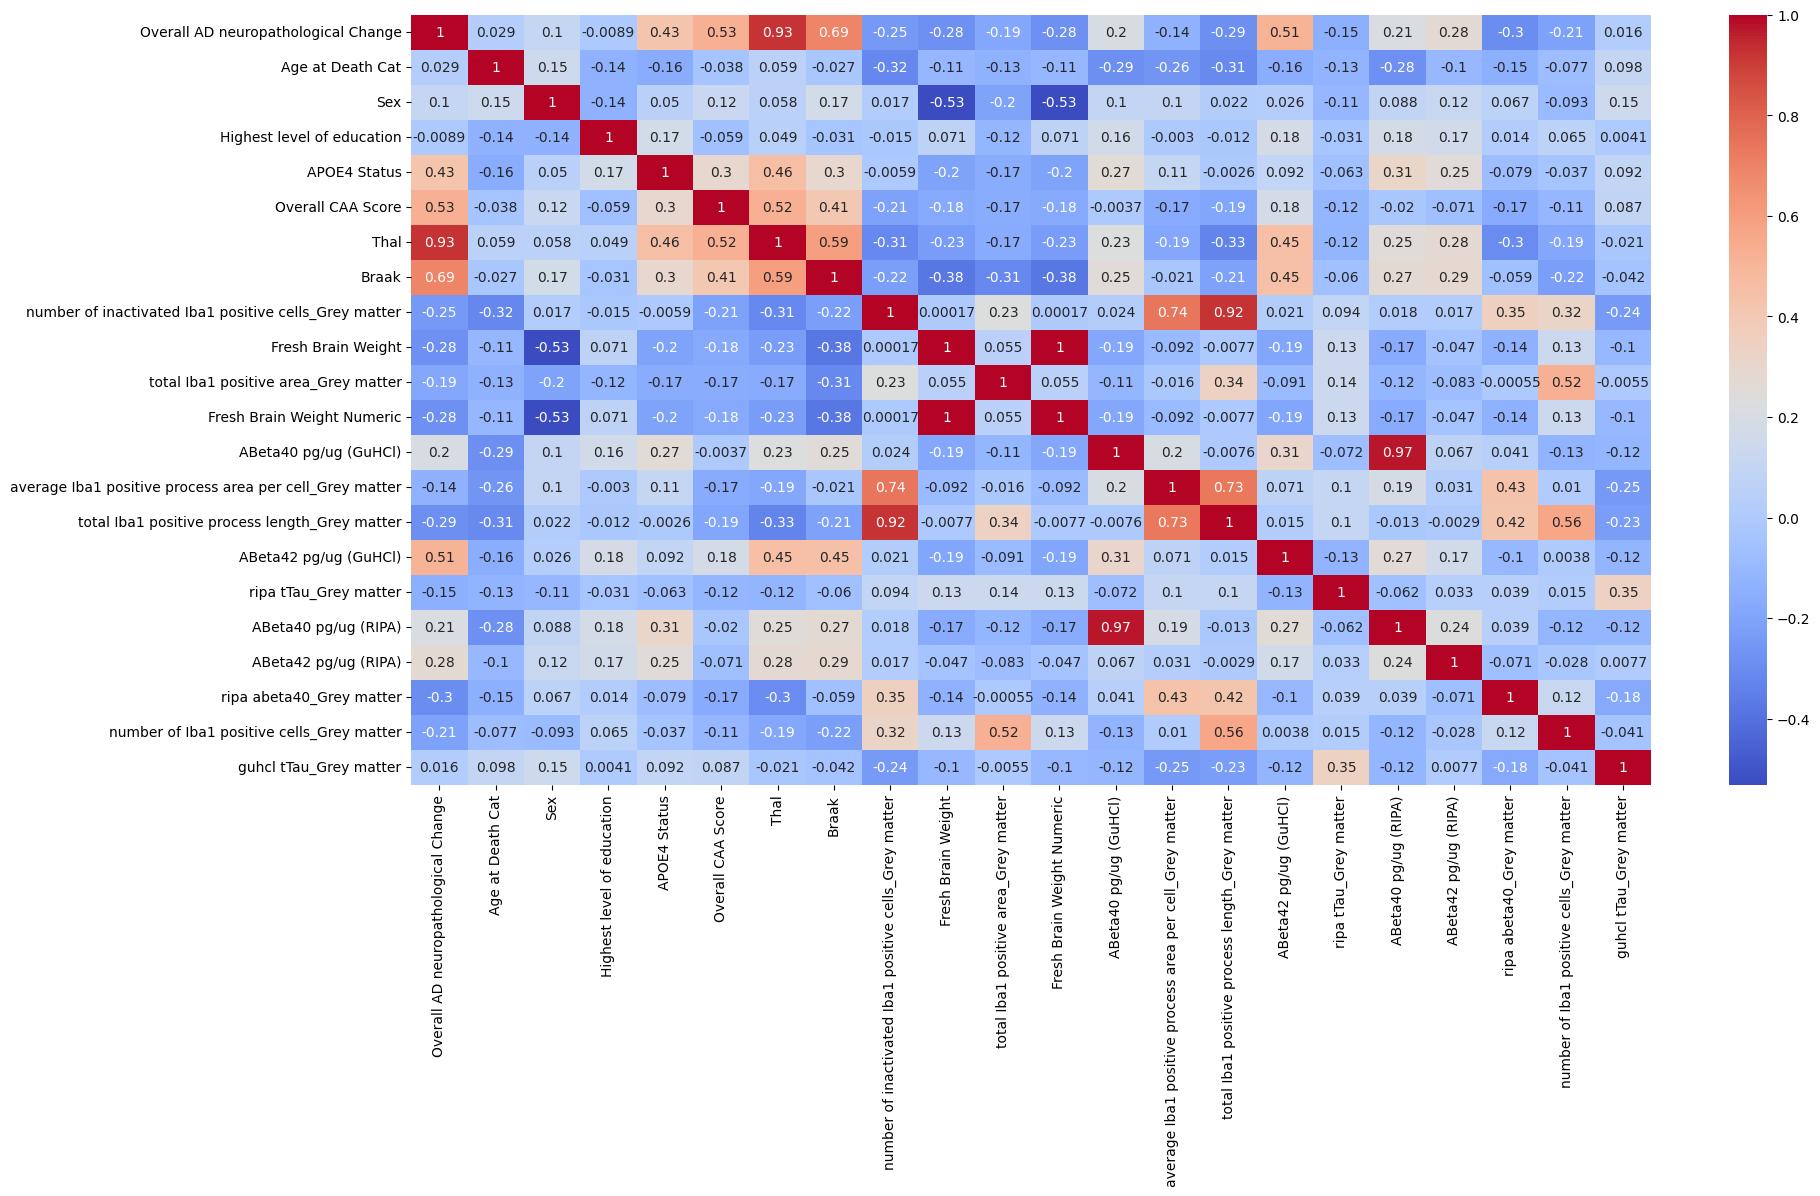

In [101]:
correlation_matrix = final_features_data.corr()

plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

Removing highly correlated features. I choose to keep RIPA over GuHCl. Fresh Brain Weight was removed because it was identical to Fresh BRain Weight Numeric. The rest of the features removed because of their lower F-score and p-value from feature_importance.

In [102]:
dropped_features = ['ABeta42 pg/ug (GuHCl)', 'ABeta40 pg/ug (GuHCl)', 'average Iba1 positive process area per cell_Grey matter', 'number of inactivated Iba1 positive cells_Grey matter', 'Fresh Brain Weight']
final_features_data.drop(dropped_features, axis=1, inplace=True)
final_features_data.to_excel('final_features_selected.xlsx', index=False)

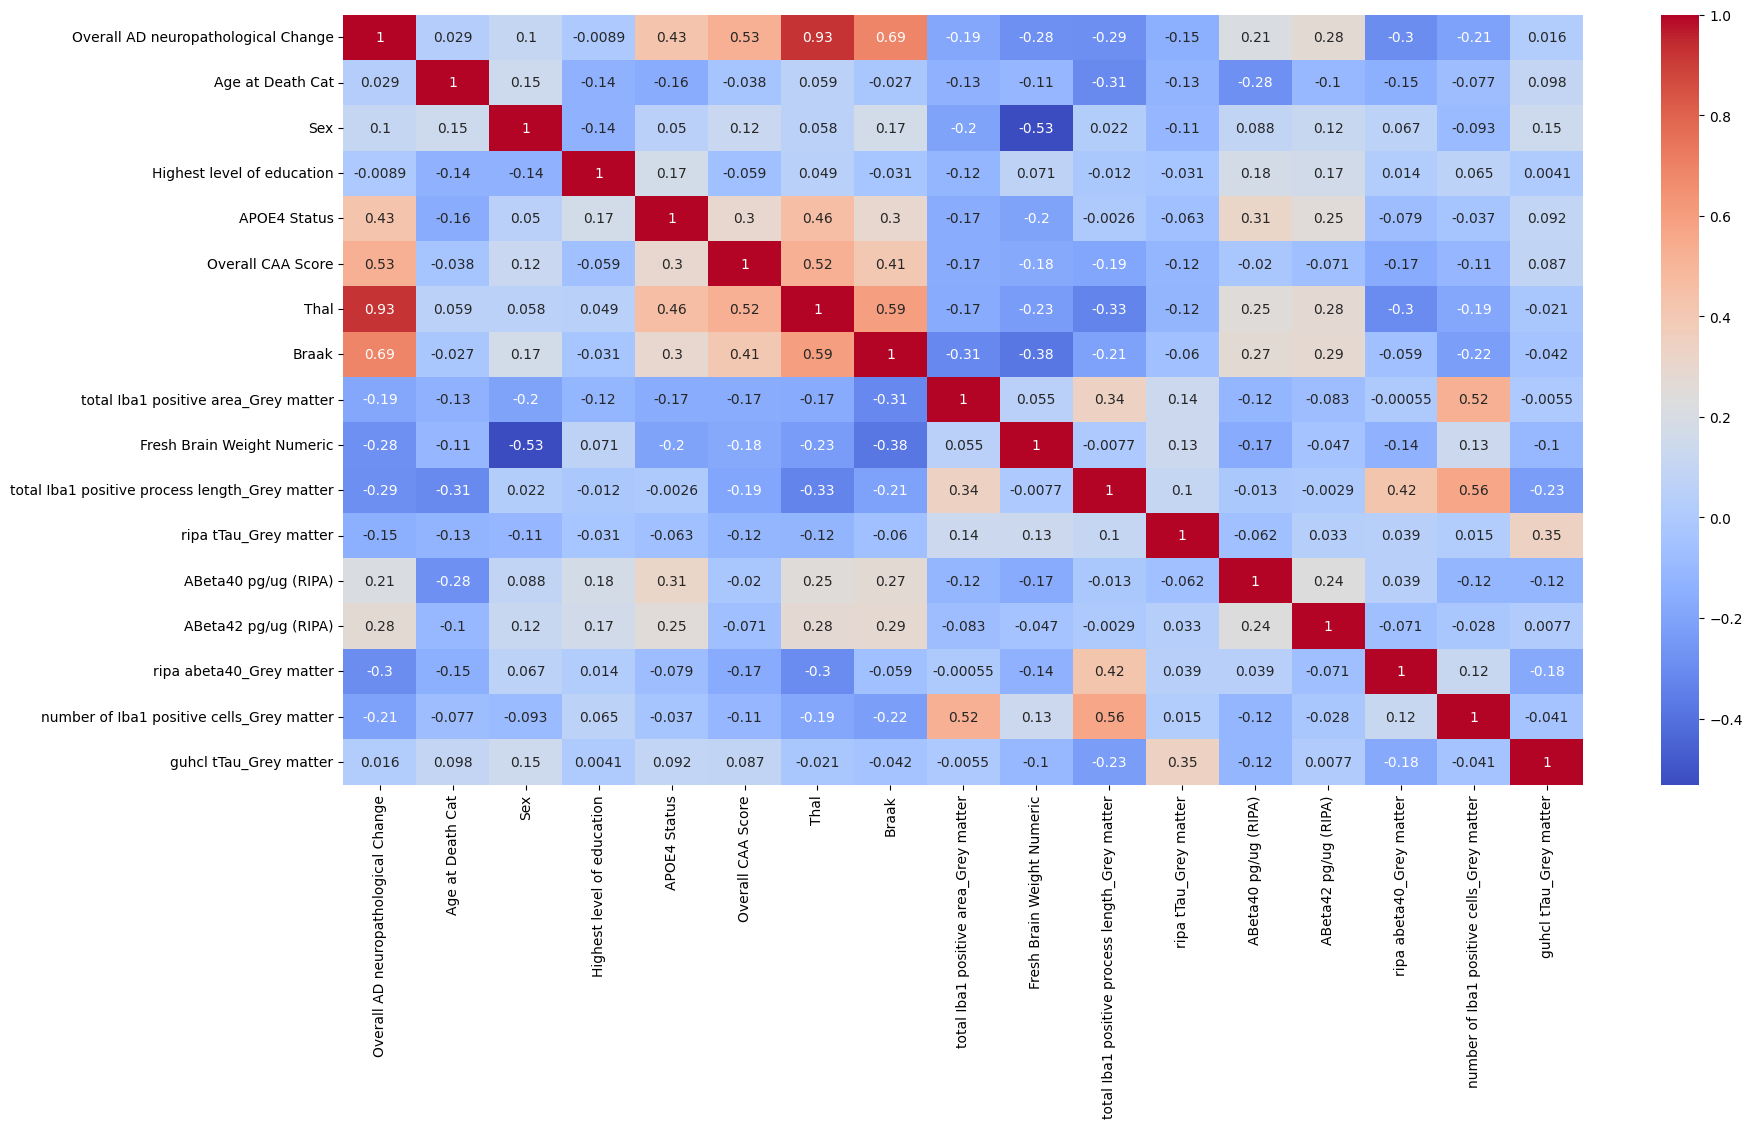

In [103]:
correlation_matrix = final_features_data.corr()

plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')